<a href="https://colab.research.google.com/github/SaraAcet/Beslenme.php/blob/main/kedi_k%C3%B6pek_s%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  # Google Colab ortamında Google Drive'ı bağlamak için gerekli olan 'drive' modülünü içeri aktarır.
drive.mount('/content/drive')  # Google Drive'ı bağlar ve '/content/drive' yolunda erişilebilir hale getirir.


Mounted at /content/drive


In [ ]:
import os  # 'os' modülünü içeri aktarır. Bu modül, dosya ve dizin işlemleri gibi işletim sistemiyle etkileşimde bulunmayı sağlar.

# Veri seti yolunu belirtiyoruz
data_dir = '/content/drive/MyDrive/KediKopekSınıflandırma/KediKopekVeriSeti/'  # Veri setinin bulunduğu dizinin yolunu belirtir.

# Sınıflar (klasörler) dizinlerini alıyoruz
classes = [class_name for class_name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_name))]
# 'data_dir' içindeki her öğeyi kontrol eder ve yalnızca dizin olan (klasör) öğeleri 'classes' listesine ekler.
# Bu, sınıflarımızı belirler (örneğin, "Kedi", "Köpek" gibi).

print(f"Sınıflar: {classes}")  # 'classes' listesinde bulunan sınıfları ekrana yazdırır.

# Her sınıftaki görüntü sayısını kontrol ediyoruz
for class_name in classes:  # Her bir sınıf ismi üzerinde döner.
    class_dir = os.path.join(data_dir, class_name)  # Her sınıfın (klasörün) tam yolunu oluşturur.
    print(f"{class_name} sınıfındaki görüntü sayısı: {len(os.listdir(class_dir))}")
    # Sınıfın dizinindeki dosya sayısını alır ve bu sayıyı ekrana yazdırır.
    # Burada, her bir sınıfın içinde bulunan görüntülerin sayısını öğrenmiş oluruz.


Sınıflar: ['test_set', 'training_set']
test_set sınıfındaki görüntü sayısı: 2
training_set sınıfındaki görüntü sayısı: 2


In [ ]:
import tensorflow as tf  # TensorFlow kütüphanesini içeri aktarır, derin öğrenme ve makine öğrenmesi için kullanılır.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Görüntü verilerini hazırlamak için kullanılan ImageDataGenerator sınıfını içeri aktarır.
# Verileri yeniden boyutlandırmak için image size
img_size = (150, 150)  # Görüntülerin boyutlarını 150x150 piksel olarak ayarlamak için kullanılır. Model bu boyutta görüntüleri bekler.
batch_size = 32  # Modelin her adımda işlediği görüntü sayısını belirtir. Bu durumda her batch 32 görüntü içerir.
# Veri artırma ve yeniden ölçekleme
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# 'ImageDataGenerator', veri artırma, ölçekleme ve verileri yüklemek için kullanılan bir sınıftır.
# rescale=1./255, görüntülerin piksel değerlerini 0-1 arasına normalize eder (orijinalde 0-255 arasıdır).
# validation_split=0.2, veri setinin %20'sinin doğrulama verisi olarak ayrılmasını sağlar.
train_generator = train_datagen.flow_from_directory(  # Eğitim verilerini belirtilen klasörden okur.
    data_dir,  # Verilerin bulunduğu ana dizini belirtir.
    target_size=img_size,  # Görüntüleri 150x150 boyutlarına yeniden boyutlandırır.
    batch_size=batch_size,  # Her seferinde 32 görüntü ile eğitim yapılır.
    class_mode='binary',  # İki sınıflı sınıflama için kullanılır; etiketler 0 veya 1 olarak döndürülür.
    subset='training'  # Veri setinin eğitim (training) kısmını kullanır (validation_split ile ayrılan kısmın dışında kalan %80).
)
validation_generator = train_datagen.flow_from_directory(  # Doğrulama verilerini belirtilen klasörden okur.
    data_dir,  # Verilerin bulunduğu ana dizini belirtir.
    target_size=img_size,  # Görüntüleri 150x150 boyutlarına yeniden boyutlandırır.
    batch_size=batch_size,  # Her seferinde 32 görüntü ile doğrulama yapılır.
    class_mode='binary',  # İki sınıflı sınıflama için etiketler 0 veya 1 olur.
    subset='validation'  # Veri setinin doğrulama (validation) kısmını kullanır (%20'lik kısmı).
)


Found 8039 images belonging to 2 classes.
Found 2009 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
# 'train_generator.class_indices' eğitim veri akışındaki (train_generator) sınıfların (class) indekslerini ve adlarını yazdırır.
# Bu, her sınıfın dizindeki hangi klasöre karşılık geldiğini gösterir. Örneğin, "Kedi" => 0 ve "Köpek" => 1 gibi bir çıktı alabilirsiniz.
print(f'Toplam eğitim görüntüleri: {train_generator.samples}')
# 'train_generator.samples' toplamda eğitim veri akışında bulunan (training) görüntü sayısını döndürür.
# Bu satır, eğitim verisi setindeki toplam resim sayısını yazdırır.
print(f'Toplam doğrulama görüntüleri: {validation_generator.samples}')
# 'validation_generator.samples' toplamda doğrulama veri akışında bulunan (validation) görüntü sayısını döndürür.
# Bu satır, doğrulama verisi setindeki toplam resim sayısını yazdırır.


{'test_set': 0, 'training_set': 1}
Toplam eğitim görüntüleri: 8039
Toplam doğrulama görüntüleri: 2009


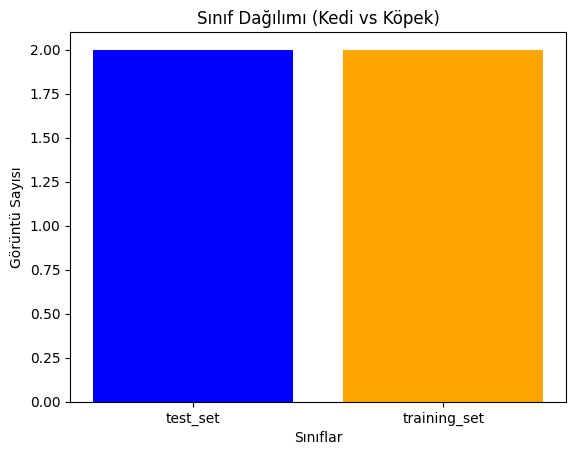

In [ ]:
import matplotlib.pyplot as plt  # Matplotlib kütüphanesinden 'pyplot' modülünü içeri aktarır. Bu modül, grafik ve görselleştirmeler oluşturmak için kullanılır.
# Sınıflardaki görüntü sayıları
class_counts = [len(os.listdir(os.path.join(data_dir, class_name))) for class_name in classes]
# Bu satır, her sınıftaki (örneğin "Kedi" ve "Köpek") görüntülerin sayısını hesaplar.
# 'os.listdir()' ile her sınıf klasöründeki dosyaların listesini alır ve 'len()' fonksiyonu ile bu listeyi sayar.
# 'class_counts' listesi, her sınıftaki görüntü sayılarından oluşur.
# Bar grafiği çizme
plt.bar(classes, class_counts, color=['blue', 'orange'])
# plt.bar(), bir bar grafiği çizen fonksiyondur. 'classes' sınıf isimlerini (örneğin, "Kedi" ve "Köpek"),
# 'class_counts' ise her sınıftaki görüntü sayısını içerir.
# 'color' parametresi, grafikteki barların renklerini belirler. Burada "Kedi" için mavi, "Köpek" için turuncu seçilmiştir.
plt.title('Sınıf Dağılımı (Kedi vs Köpek)')  # Grafiğe başlık ekler. Burada başlık "Sınıf Dağılımı (Kedi vs Köpek)" olarak belirlenmiştir.
plt.xlabel('Sınıflar')  # X eksenine etiket ekler. Burada "Sınıflar" ifadesi kullanılır.
plt.ylabel('Görüntü Sayısı')  # Y eksenine etiket ekler. Burada "Görüntü Sayısı" ifadesi kullanılır.
plt.show()  # Grafiği ekrana basar ve gösterir.


In [ ]:
# Sınıfları kontrol etmek için
classes = os.listdir(data_dir)  # 'data_dir' dizinindeki tüm dosya ve klasörlerin listesini alır.
# Bu, veri setindeki tüm sınıf isimlerini (örneğin, "Kedi", "Köpek" gibi) içerir.
# 'os.listdir()' fonksiyonu, belirtilen dizindeki tüm dosya ve klasörlerin adlarını bir liste olarak döndürür.
print(f"Veri setindeki sınıflar: {classes}")
# 'classes' listesindeki sınıf isimlerini ekrana yazdırır.
# Bu satır, veri setindeki tüm sınıf isimlerini (klasörleri) ekrana yazdırır.


Veri setindeki sınıflar: ['test_set', 'training_set', 'modelim.h5', 'imageee.jpg']


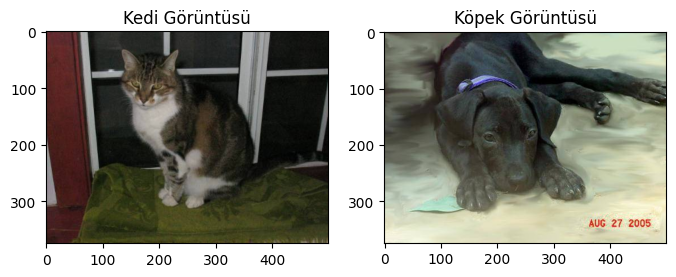

In [ ]:
import numpy as np  # NumPy kütüphanesini içeri aktarır, veri işlemleri ve matematiksel hesaplamalar için kullanılır (bu kodda doğrudan kullanılmasa da genellikle bu tür projelerde kullanılır).
import matplotlib.pyplot as plt  # Grafik çizimi için Matplotlib kütüphanesini içeri aktarır.
import matplotlib.image as mpimg  # Görüntüleri okuma ve görselleştirme için 'matplotlib.image' modülünü içeri aktarır.
import os  # Dosya ve klasör işlemleri için 'os' kütüphanesini içeri aktarır.
# Kedi ve köpek görüntülerinin bulunduğu training klasörünü belirtiyoruz
training_dir = os.path.join(data_dir, 'training_set/')
# 'data_dir' dizinindeki 'training_set' klasörüne erişim sağlanır. Buradaki 'training_set', eğitim verilerinin bulunduğu ana klasördür.
# Kedi ve köpekten rastgele birer görüntü seçiyoruz
cat_image_path = os.path.join(training_dir, 'cats', os.listdir(os.path.join(training_dir, 'cats'))[0])
dog_image_path = os.path.join(training_dir, 'dogs', os.listdir(os.path.join(training_dir, 'dogs'))[0])
# 'cats' klasöründeki ilk kedi görüntüsünün yolunu alır (os.listdir ile klasördeki dosyaların listesini alır ve [0] ile ilk görüntüyü seçer).
# Aynı şekilde 'dogs' klasöründen ilk köpek görüntüsünün yolunu alır.
# Görüntüleri yükleme ve gösterme
cat_img = mpimg.imread(cat_image_path)  # Kedi görüntüsünü okur ve 'cat_img' değişkenine atar.
dog_img = mpimg.imread(dog_image_path)  # Köpek görüntüsünü okur ve 'dog_img' değişkenine atar.
# Görüntüleri görselleştirme
plt.figure(figsize=(8,4))  # Grafik boyutunu ayarlamak için plt.figure() fonksiyonu kullanılır. Boyut (8,4) olarak belirlenmiştir.

plt.subplot(1, 2, 1)  # Grafik üzerinde 1 satır, 2 sütunlu bir düzenleme yapar ve ilk (1. sütundaki) alt grafikte kedi görüntüsünü gösterir.
plt.imshow(cat_img)  # Kedi görüntüsünü gösterir.
plt.title('Kedi Görüntüsü')  # Kedi görüntüsünün başlığını ayarlar.

plt.subplot(1, 2, 2)  # Grafik üzerinde 1 satır, 2 sütunlu bir düzenlemede ikinci (2. sütundaki) alt grafikte köpek görüntüsünü gösterir.
plt.imshow(dog_img)  # Köpek görüntüsünü gösterir.
plt.title('Köpek Görüntüsü')  # Köpek görüntüsünün başlığını ayarlar.

plt.show()  # Grafiklerin ekrana basılmasını sağlar.



In [ ]:
from PIL import Image
# Python Imaging Library (PIL) modülünü içeri aktarır. Görüntüleri açma, işleme ve kaydetme işlemleri için kullanılır.
# İlk kedi ve köpek görüntüsünün boyutlarını kontrol ediyoruz
with Image.open(cat_image_path) as img:
    # 'Image.open(cat_image_path)', kedi görüntüsünü açar. 'cat_image_path' daha önce belirlediğimiz kedi görselinin yoludur.
    # 'with' ifadesi, görüntüyü okuma işlemi bittikten sonra dosyanın kapanmasını sağlar.

    print(f"Kedi görüntüsünün boyutu: {img.size}")
    # 'img.size', görüntünün boyutlarını verir. Bu, (genişlik, yükseklik) formatında bir tuple döndürür.
    # Bu satırda kedi görüntüsünün boyutu ekrana yazdırılır.
with Image.open(dog_image_path) as img:
    # Aynı şekilde 'dog_image_path' yolundaki köpek görüntüsü açılır.
    print(f"Köpek görüntüsünün boyutu: {img.size}")
    # 'img.size', köpek görüntüsünün boyutlarını (genişlik, yükseklik) döndürür ve yazdırılır.


Kedi görüntüsünün boyutu: (499, 375)
Köpek görüntüsünün boyutu: (500, 374)


In [ ]:
import tensorflow as tf  # TensorFlow kütüphanesini içeri aktarır, derin öğrenme modelleri için kullanılır.
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Görüntü verilerini hazırlamak için kullanılan ImageDataGenerator sınıfını içeri aktarır.
# Görüntü boyutları (model için uygun boyut)
img_size = (150, 150)  # Model için kullanılacak görüntü boyutunu belirler. Bu durumda her görüntü 150x150 piksel olacak.
batch_size = 32  # Modelin her iterasyonda işleyeceği görüntü sayısını belirler. Her batch 32 görüntü içerecek.
# Veri artırma ve yeniden ölçekleme (normalleştirme)
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalleştirme: Görüntülerin piksel değerlerini 0-1 arası bir değere getirir (orijinalde 0-255 arasıdır).
    validation_split=0.2,      # Eğitim verisinin %80'ini eğitim için, %20'sini doğrulama için ayırır.
    rotation_range=20,         # Görüntüyü rastgele 20 dereceye kadar döndürülebilir.
    width_shift_range=0.2,     # Görüntüyü yatayda rastgele %20 oranında kaydırabilir.
    height_shift_range=0.2,    # Görüntüyü dikeyde rastgele %20 oranında kaydırabilir.
    shear_range=0.2,           # Görüntüyü yatay kaydırarak eğik hale getirebilir.
    zoom_range=0.2,            # Görüntüyü rastgele %20 oranında yakınlaştırabilir.
    horizontal_flip=True,      # Görüntüyü yatayda rastgele çevirebilir.
    fill_mode='nearest'        # Görüntüdeki boş alanları en yakın komşulukla doldurur.
)
# Eğitim veri seti için veri artırma
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'training_set'),  # Eğitim verilerinin bulunduğu klasörün yolu
    target_size=img_size,  # Görüntüleri 150x150 boyutuna yeniden boyutlandırır.
    batch_size=batch_size,  # Her batch'te 32 görüntü içerir.
    class_mode='binary',  # İki sınıflı sınıflama (Kedi vs Köpek) için binary etiketleme.
    subset='training'      # Eğitim verisi kullanılır (validation_split ile ayrılan %80'lik kısım).
)
# Doğrulama veri seti (yalnızca normalleştirme yapılacak)
validation_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'training_set'),  # Eğitim verilerinin bulunduğu klasör
    target_size=img_size,  # Görüntüleri 150x150 boyutuna yeniden boyutlandırır.
    batch_size=batch_size,  # Her batch'te 32 görüntü içerir.
    class_mode='binary',  # İki sınıflı sınıflama (Kedi vs Köpek)
    subset='validation'    # Doğrulama verisi kullanılır (%20'lik kısım).
)


Found 6420 images belonging to 2 classes.
Found 1605 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Sadece normalleştirme
# Test veri seti
test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test_set'),  # Test verilerinin bulunduğu klasörün yolu
    target_size=img_size,               # Görüntüleri 150x150 boyutuna getirir
    batch_size=batch_size,              # Her batch'te 32 görüntü içerir
    class_mode='binary'                 # İki sınıflı sınıflama (Kedi vs Köpek)
)


Found 2023 images belonging to 2 classes.


Görüntülerin şekli: (32, 150, 150, 3)
Etiketlerin şekli: (32,)


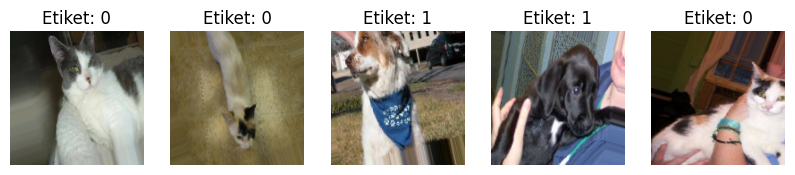

Etiket dağılımı: {0.0: 17, 1.0: 15}
Manuel Etiketler: [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
Manuel Etiket Dağılımı: {0: 17, 1: 15}


In [ ]:
images, labels = next(train_generator)
print(f"Görüntülerin şekli: {images.shape}")
print(f"Etiketlerin şekli: {labels.shape}")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])

    # Eğer etiketler one-hot encoding şeklindeyse argmax kullan
    if len(labels.shape) > 1:
        label = np.argmax(labels[i])  # 0: kedi, 1: köpek
    else:
        label = int(labels[i])

    # Burada kediye 0, köpeğe 1 verecek şekilde ayarla
    display_label = label  # Zaten 0 ve 1 olmalı

    plt.title(f"Etiket: {display_label}")  # Kedi için 0, köpek için 1
    plt.axis('off')

plt.show()
unique, counts = np.unique(labels, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("Etiket dağılımı:", label_distribution)
manual_labels = [0 if label == 0 else 1 for label in labels]

print("Manuel Etiketler:", manual_labels)
unique_manual, counts_manual = np.unique(manual_labels, return_counts=True)
label_distribution_manual = dict(zip(unique_manual, counts_manual))
print("Manuel Etiket Dağılımı:", label_distribution_manual)


In [ ]:
from tensorflow.keras.models import Sequential  # Keras'tan Sequential modelini içeri aktarıyoruz
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Gerekli katmanları içeri aktarıyoruz

# Modelin başlangıcını Sequential olarak başlatıyoruz
model = Sequential([
    # İlk Konvolüsyon Katmanı: 32 filtre, 3x3 boyutunda, 'relu' aktivasyon fonksiyonu ile
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 150x150 boyutunda 3 kanal (RGB) giriş alacak
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling ile her özellik haritasının boyutunu yarıya indiriyoruz (2x2)

    # İkinci Konvolüsyon Katmanı: 64 filtre, 3x3 boyutunda, 'relu' aktivasyon fonksiyonu ile
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling ile her özellik haritasının boyutunu yarıya indiriyoruz (2x2)

    # Üçüncü Konvolüsyon Katmanı: 128 filtre, 3x3 boyutunda, 'relu' aktivasyon fonksiyonu ile
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling ile her özellik haritasının boyutunu yarıya indiriyoruz (2x2)

    # Dördüncü Konvolüsyon Katmanı: 256 filtre, 3x3 boyutunda, 'relu' aktivasyon fonksiyonu ile
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling ile her özellik haritasının boyutunu yarıya indiriyoruz (2x2)

    # Düzleştirme Katmanı: Çok boyutlu veriyi tek boyutlu hale getiriyoruz (flatten)
    Flatten(),  # Tüm 2D veriyi 1D vektör haline getirir

    # Yoğun (Fully Connected) Katman: 512 nöronlu, 'relu' aktivasyon fonksiyonlu
    Dense(512, activation='relu'),  # Bu katman, modelin daha karmaşık özellikleri öğrenmesini sağlar

    # Dropout Katmanı: Aşırı öğrenmeyi engellemek için rastgele bağlantıları %50 oranında kapatıyoruz
    Dropout(0.5),  # Eğitim sırasında her seferinde %50 nöron kapatılır (aşırı öğrenmeyi engellemek için)

    # Çıkış Katmanı: İkili sınıflandırma için tek bir nöron ve 'sigmoid' aktivasyon fonksiyonu kullanıyoruz
    Dense(1, activation='sigmoid')  # İkili sınıflandırma için çıkış: 0 veya 1 sınıfı

])

# Modeli derleme aşaması: optimizer, loss fonksiyonu ve başarı metriği belirliyoruz
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adam optimizasyonu, binary_crossentropy kaybı ve accuracy metriği

# Modelin özetini yazdırıyoruz: Katman yapısını ve parametre sayısını gösterir
model.summary()  # Modelin özetini alır ve katmanların detaylarını gösterir


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#veri artırma aşaması
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalleştirme
    rotation_range=40,         # Görüntüyü rastgele 40 derece döndürme
    width_shift_range=0.2,     # Rastgele yatay kaydırma
    height_shift_range=0.2,    # Rastgele dikey kaydırma
    shear_range=0.2,           # Rastgele kaydırma
    zoom_range=0.2,            # Rastgele yakınlaştırma
    horizontal_flip=True,      # Yatayda çevirme
    fill_mode='nearest'        # Boş alanları doldurma
)


validation_datagen = ImageDataGenerator(rescale=1./255)  # Doğrulama veri seti normalleştirilir

# Eğitim ve doğrulama veri setlerinin yüklenmesi
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/KediKopekSınıflandırma/KediKopekVeriSeti/training_set/',  # Eğitim verisinin yolu
    target_size=(150, 150),    # Görüntü boyutu
    batch_size=32,             # Batch boyutu
    class_mode='binary'        # İkili sınıflandırma
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/KediKopekSınıflandırma/KediKopekVeriSeti/test_set/',  # Doğrulama verisinin yolu
    target_size=(150, 150),    # Görüntü boyutu
    batch_size=32,             # Batch boyutu
    class_mode='binary'        # İkili sınıflandırma
)

# Modelin eğitilmesi
history = model.fit(# model eğitme
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,    # Eğitim döngü sayısı,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)



Found 8025 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/250 ━━━━━━━━━━━━━━━━━━━━ 12:50 6s/step - accuracy: 0.5234 - loss: 0.7063

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecinin görselleştirilmesi
plt.figure(figsize=(12, 4))

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()



In [ ]:
# Modeli kaydetme
model.save('/content/drive/MyDrive/KediKopekSınıflandırma/KediKopekVeriSeti/modelim.h5')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [ ]:
# Doğrulama veri seti için tahminler yap
validation_steps = validation_generator.samples // validation_generator.batch_size
y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred = np.round(y_pred).astype(int)  # Tahminleri 0 veya 1'e yuvarla (ikili sınıflandırma için)

# Doğrulama veri setinin gerçek etiketlerini al
y_true = validation_generator.classes[:len(y_pred)]


63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 695ms/step


In [ ]:
# Doğruluk
accuracy = accuracy_score(y_true, y_pred)
print(f'Doğruluk: {accuracy:.4f}')

# Precision
precision = precision_score(y_true, y_pred)
print(f'Precision (Kesinlik): {precision:.4f}')

# Recall
recall = recall_score(y_true, y_pred)
print(f'Recall (Duyarlılık): {recall:.4f}')

# F1 Skoru
f1 = f1_score(y_true, y_pred)
print(f'F1 Skoru: {f1:.4f}')


Doğruluk: 0.4916
Precision (Kesinlik): 0.4912
Recall (Duyarlılık): 0.5532
F1 Skoru: 0.5204


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Doğrulama veri seti üzerinde tahmin yapma
validation_steps = validation_generator.samples // validation_generator.batch_size
y_pred = model.predict(validation_generator, steps=validation_steps)

# Tahminleri ikili sınıflandırma için 0 veya 1'e yuvarla
y_pred = np.round(y_pred).astype(int)

# Doğrulama veri setinin gerçek etiketlerini al
y_true = validation_generator.classes[:len(y_pred)]


63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 736ms/step


In [ ]:
# Sınıflandırma raporunu oluştur
report = classification_report(y_true, y_pred, target_names=['Kedi', 'Köpek'])
print(report)


              precision    recall  f1-score   support

        Kedi       0.53      0.47      0.50      1011
       Köpek       0.52      0.59      0.55      1005

    accuracy                           0.53      2016
   macro avg       0.53      0.53      0.53      2016
weighted avg       0.53      0.53      0.53      2016



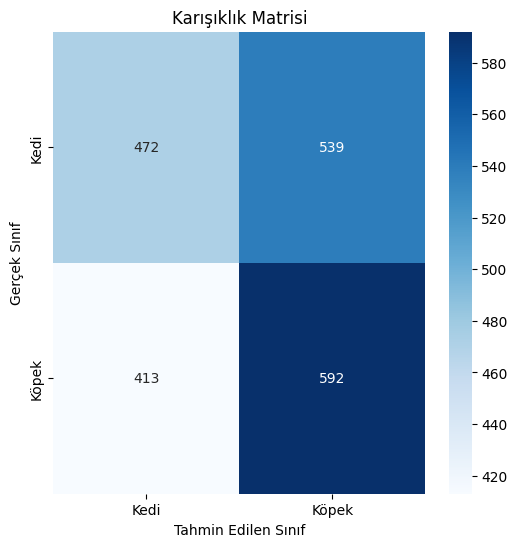

In [ ]:
# Karışıklık matrisini oluştur
cm = confusion_matrix(y_true, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kedi', 'Köpek'], yticklabels=['Kedi', 'Köpek'])
plt.title('Karışıklık Matrisi')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()


In [ ]:


"""


import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

test_image_path='/content/drive/MyDrive/KediKopekSınıflandırma/KediKopekVeriSeti/imageee.jpg'
img=image.load_img(test_image_path,target_size=(150,150))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0) / 255.0

# Tahmin yap
prediction = model.predict(img_array)
print(prediction)
if prediction[0] > 0.5:
    prediction_label = 'Kedi'

else:
   prediction_label = 'Köpek'


plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f'Tahmin: {prediction_label}')
plt.axis('off')
plt.show()


"""